In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

- Start	: A data em que os dados começam a ser registrados.
- End: A data em que os dados terminam.
- Open: O preço de abertura do Bitcoin no início do dia.
- High: O preço mais alto atingido pelo Bitcoin durante o dia.
- Baixo: O preço mais baixo atingido pelo Bitcoin durante o dia.
- Low: O preço de fechamento no final do dia.
- Close: A quantidade total de Bitcoin negociada durante o dia.
- Market Cap: O valor total de mercado do Bitcoin no final do dia.

In [2]:
cotacao = pd.read_csv("bitcoin_2010-07-27_2024-04-25.csv", sep=",")

cotacao.head()

,Start,End,Open,High,Low,Close,Volume,Market Cap
0,2024-04-24,2024-04-25,66553.54,67070.40,63742.73,64291.07,1.384736e+11,1.294489e+12
1,2024-04-23,2024-04-24,66761.02,67174.02,65884.15,66386.61,1.408621e+11,1.308576e+12
2,2024-04-22,2024-04-23,64952.02,67180.03,64598.00,66818.89,1.400725e+11,1.299703e+12
3,2024-04-21,2024-04-22,64875.75,65638.74,64302.47,64896.87,1.326574e+11,1.278730e+12
4,2024-04-20,2024-04-21,63824.06,65351.33,63321.19,64857.99,1.537410e+11,1.263725e+12


In [3]:
cotacao.shape

(5021, 8)

In [4]:
cotacao.dtypes

Start          object
End            object
Open          float64
High          float64
Low           float64
Close         float64
Volume        float64
Market Cap    float64
dtype: object

Transformando as colunas 'Start' e 'End' em colunas do tipo datatime

In [5]:
cotacao['Start'] = pd.to_datetime(cotacao['Start'])
cotacao['End'] = pd.to_datetime(cotacao['End'])

In [6]:
cotacao.dtypes

Start         datetime64[ns]
End           datetime64[ns]
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume               float64
Market Cap           float64
dtype: object

In [7]:
cotacao = cotacao.sort_values(by='Start')

In [8]:
cotacao.loc[:, 'Year'] = cotacao['Start'].dt.year
cotacao.loc[:, 'Mes'] = cotacao['Start'].dt.month

In [9]:
cotacao.loc[:, 'MM_close'] = cotacao['Close'].rolling(window=30).mean()
cotacao.loc[:, 'MM_volume'] = cotacao['Volume'].rolling(window=30).mean()
cotacao.loc[:, 'MM_market_cap'] = cotacao['Market Cap'].rolling(window=30).mean()
cotacao.head()

,Start,End,Open,High,Low,Close,Volume,Market Cap,Year,Mes,MM_close,MM_volume,MM_market_cap
5020,2010-07-27,2010-07-28,0.0600,0.0600,0.0600,0.0600,0.0,0.0,2010,7,NaN,NaN,NaN
5019,2010-07-28,2010-07-29,0.0589,0.0589,0.0589,0.0589,0.0,0.0,2010,7,NaN,NaN,NaN
5018,2010-07-29,2010-07-30,0.0699,0.0699,0.0699,0.0699,0.0,0.0,2010,7,NaN,NaN,NaN
5017,2010-07-30,2010-07-31,0.0627,0.0627,0.0627,0.0627,0.0,0.0,2010,7,NaN,NaN,NaN
5016,2010-07-31,2010-08-01,0.0679,0.0679,0.0679,0.0679,0.0,0.0,2010,7,NaN,NaN,NaN


https://g1.globo.com/economia/noticia/2022/05/10/bitcoin-em-queda-entenda-a-desvalorizacao-das-criptomoedas.ghtml

Pegando os dados a partir de 2021, ano onde aconteceu a maior alta (novembro) até o momento da noticia.

In [10]:
dados = cotacao.loc[cotacao['Start'].dt.year >= 2021]
dados.head()

,Start,End,Open,High,Low,Close,Volume,Market Cap,Year,Mes,MM_close,MM_volume,MM_market_cap
1209,2021-01-01,2021-01-02,28938.896888,29560.027546,28718.621788,29300.190936,6.455859e+10,5.429904e+11,2021,1,22437.174318,6.245949e+10,4.130268e+11
1208,2021-01-02,2021-01-03,29329.695772,33158.612438,29014.295884,32093.264962,7.010424e+10,5.704312e+11,2021,1,22859.351318,6.328095e+10,4.201229e+11
1207,2021-01-03,2021-01-04,32148.048500,34717.662742,32057.582963,32877.607283,1.243495e+11,6.217950e+11,2021,1,23330.698472,6.600220e+10,4.290276e+11
1206,2021-01-04,2021-01-05,32949.399464,33553.450548,29066.665438,31973.832154,1.309183e+11,5.918035e+11,2021,1,23758.904316,6.891637e+10,4.370079e+11
1205,2021-01-05,2021-01-06,32023.293433,34359.990071,30087.201862,33965.160423,1.254265e+11,5.989281e+11,2021,1,24246.519912,7.205562e+10,4.451288e+11


In [11]:
dados.shape

(1210, 13)

O cálculo de 'Liquid Movement' resultará na diferença entre o preço de fechamento e o preço de abertura. Essa diferença representa o movimento líquido do preço durante o período considerado. Se o resultado for positivo, indica que o preço de fechamento foi maior que o preço de abertura, sugerindo um aumento no preço durante o período. Se for negativo, indica que o preço de fechamento foi menor que o preço de abertura, sugerindo uma queda no preço durante o período.

Portanto, na coluna 'Variation Perc', essa diferença será dividida pelo preço de abertura e multiplicada por 100 para expressar a mudança percentual em relação ao preço de abertura. Isso nos dá uma medida da variação percentual do preço durante o período considerado.

In [12]:
#dados.loc[:, 'Liquid Movement'] = dados['Close'] - dados['Open']
#dados.loc[:, 'Variation'] = dados['Liquid Movement'] / dados['Open']
#dados.loc[:, 'Variation Perc'] = round(dados['Variation'] * 100, 2)

#dados.head()

## Variação do preço de fechamento do Bitcoin ao longo do tempo

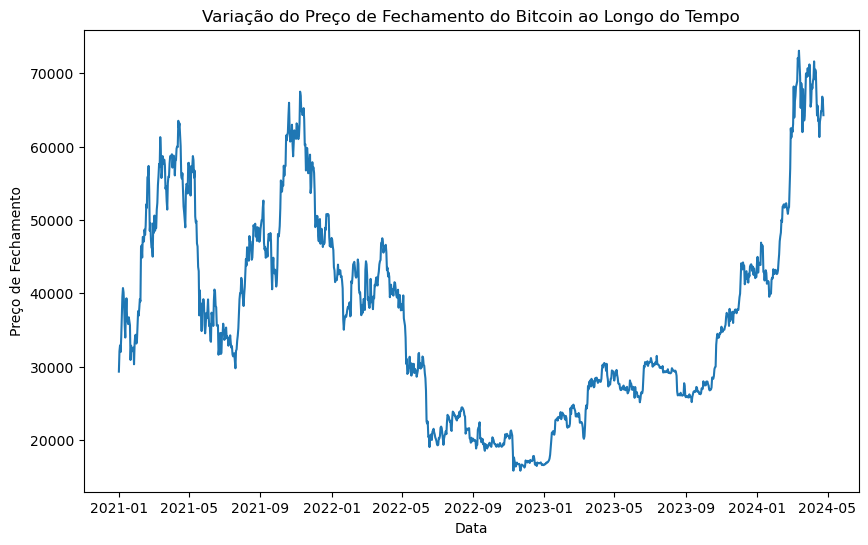

In [13]:
dados.set_index('Start', inplace=True)

plt.figure(figsize=(10,6))
plt.plot(dados['Close'])
plt.title('Variação do Preço de Fechamento do Bitcoin ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.show()

## Volume médio diário de negociações de Bitcoin por ano

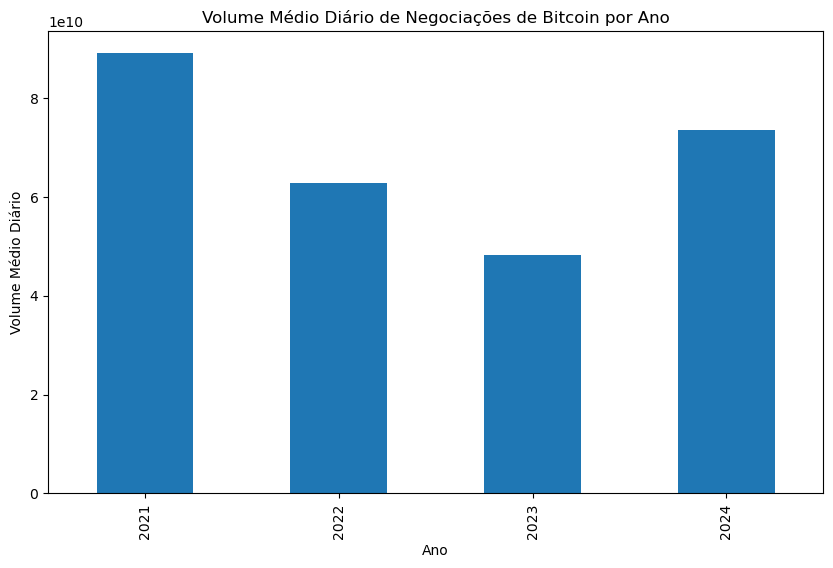

In [14]:
dados = cotacao.loc[cotacao['Start'].dt.year >= 2021].copy()

media_diaria_anual = dados.groupby('Year')['Volume'].mean()

plt.figure(figsize=(10, 6))
media_diaria_anual.plot(kind='bar')
plt.title('Volume Médio Diário de Negociações de Bitcoin por Ano')
plt.xlabel('Ano')
plt.ylabel('Volume Médio Diário')
plt.show()

## Dias com maior variação percentual no preço do Bitcoin

In [15]:
dados['pct_change'] = dados['Close'].pct_change() * 100
top_variacoes = dados.nlargest(10, 'pct_change')

top_variacoes [['Start', 'pct_change']]

,Start,pct_change
1171,2021-02-08,18.866328
786,2022-02-28,14.494855
810,2022-02-04,12.492729
1050,2021-06-09,11.914922
531,2022-11-10,11.406886
1066,2021-05-24,10.864789
593,2022-09-09,10.623128
1150,2021-03-01,10.161198
1094,2021-04-26,10.138722
1197,2021-01-13,10.044171


## Tendência sazonal nos preços do Bitcoin

OBS: Fazer por ano

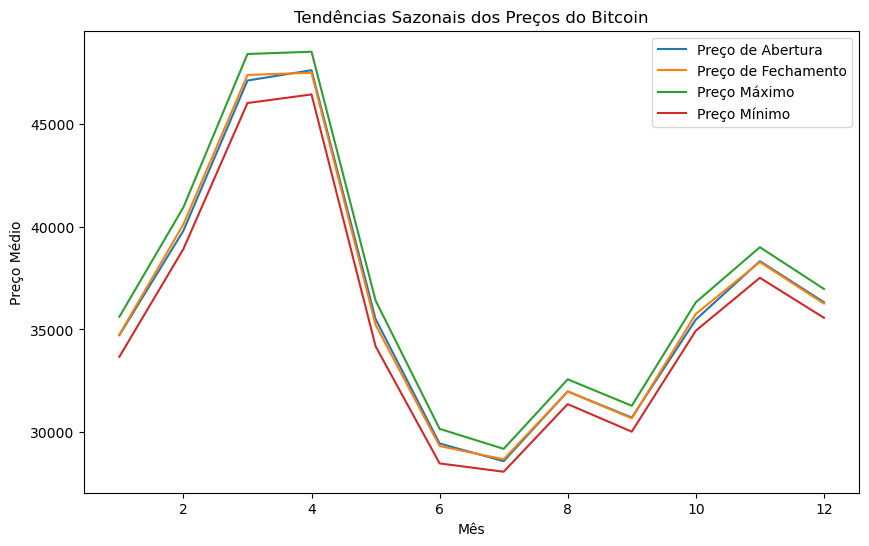

In [16]:
#dados['Mes'] = dados['Start'].dt.month
monthly_trends = dados.groupby('Mes')[['Open', 'Close', 'High', 'Low']].mean()

monthly_trends.plot(figsize=(10,6))
plt.title('Tendências Sazonais dos Preços do Bitcoin')
plt.xlabel('Mês')
plt.ylabel('Preço Médio')
plt.legend(['Preço de Abertura', 'Preço de Fechamento', 'Preço Máximo', 'Preço Mínimo'])
plt.show()

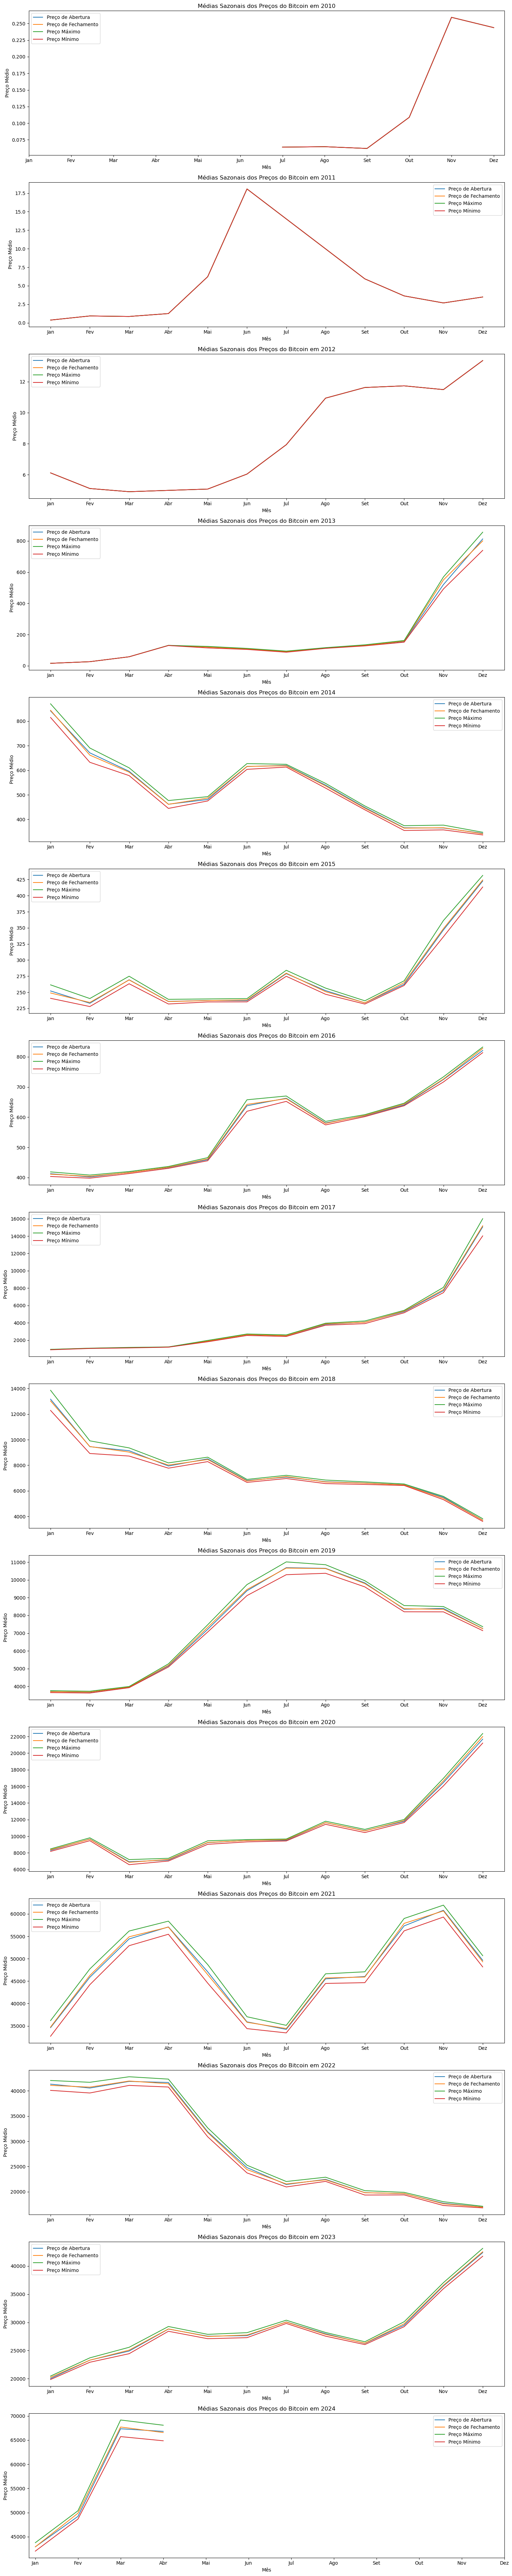

In [17]:
# Lista de anos únicos
anos = cotacao['Year'].unique().tolist()

# Criar subplots
fig, axs = plt.subplots(len(anos), 1, figsize=(15, 5 * len(anos)))

# Flatten the axs array to make it easier to iterate over
axs = axs.flatten()

# Lista de meses de 1 a 12
meses = np.arange(1, 13)

# Iterar sobre cada ano e criar um gráfico para ele
for i, ano in enumerate(anos):
    # Filtrar os dados pelo ano atual
    cotacao_ano = cotacao[cotacao['Year'] == ano]
    
    # Agrupar por mês e calcular a média dos preços
    monthly_trends = cotacao_ano.groupby('Mes')[['Open', 'Close', 'High', 'Low']].mean()
    
    # Plotar os dados no subplot correspondente
    axs[i].plot(meses, monthly_trends['Open'].reindex(meses), label='Preço de Abertura')
    axs[i].plot(meses, monthly_trends['Close'].reindex(meses), label='Preço de Fechamento')
    axs[i].plot(meses, monthly_trends['High'].reindex(meses), label='Preço Máximo')
    axs[i].plot(meses, monthly_trends['Low'].reindex(meses), label='Preço Mínimo')
    
    # Definir o título e labels
    axs[i].set_title(f'Médias Sazonais dos Preços do Bitcoin em {ano}')
    axs[i].set_xlabel('Mês')
    axs[i].set_ylabel('Preço Médio')
    axs[i].set_xticks(meses)
    axs[i].set_xticklabels(['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
    axs[i].legend()
    
# Ajustar layout para evitar sobreposição
plt.tight_layout()

# Mostrar os gráficos
plt.show()


## Correlações

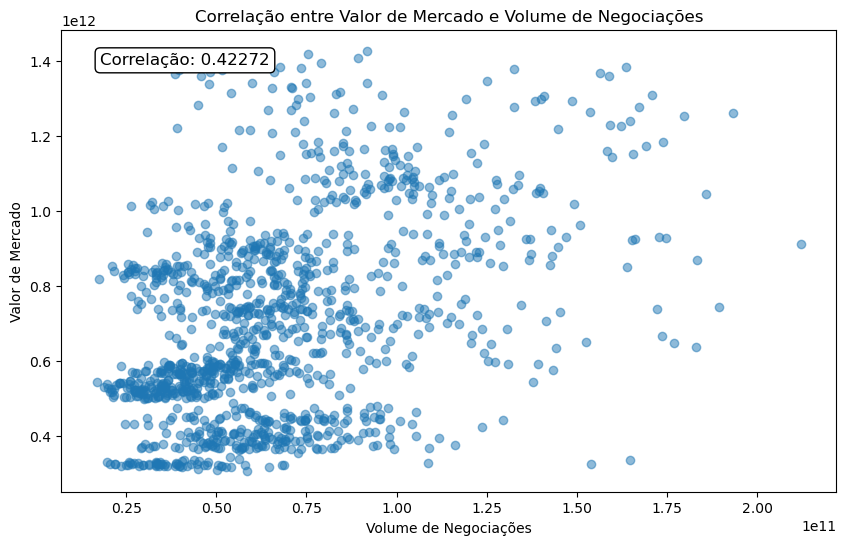

In [18]:
correlation = dados['Market Cap'].corr(dados['Volume'])

plt.figure(figsize=(10,6))
plt.scatter(dados['Volume'], dados['Market Cap'], alpha=0.5)
plt.title('Correlação entre Valor de Mercado e Volume de Negociações')
plt.xlabel('Volume de Negociações')
plt.ylabel('Valor de Mercado')
plt.annotate(f'Correlação: {correlation:.5f}', 
                    xy=(0.05, 0.95), 
                    xycoords='axes fraction', 
                    fontsize=12, 
                    ha='left', 
                    va='top',
                    bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='white'))

plt.show()

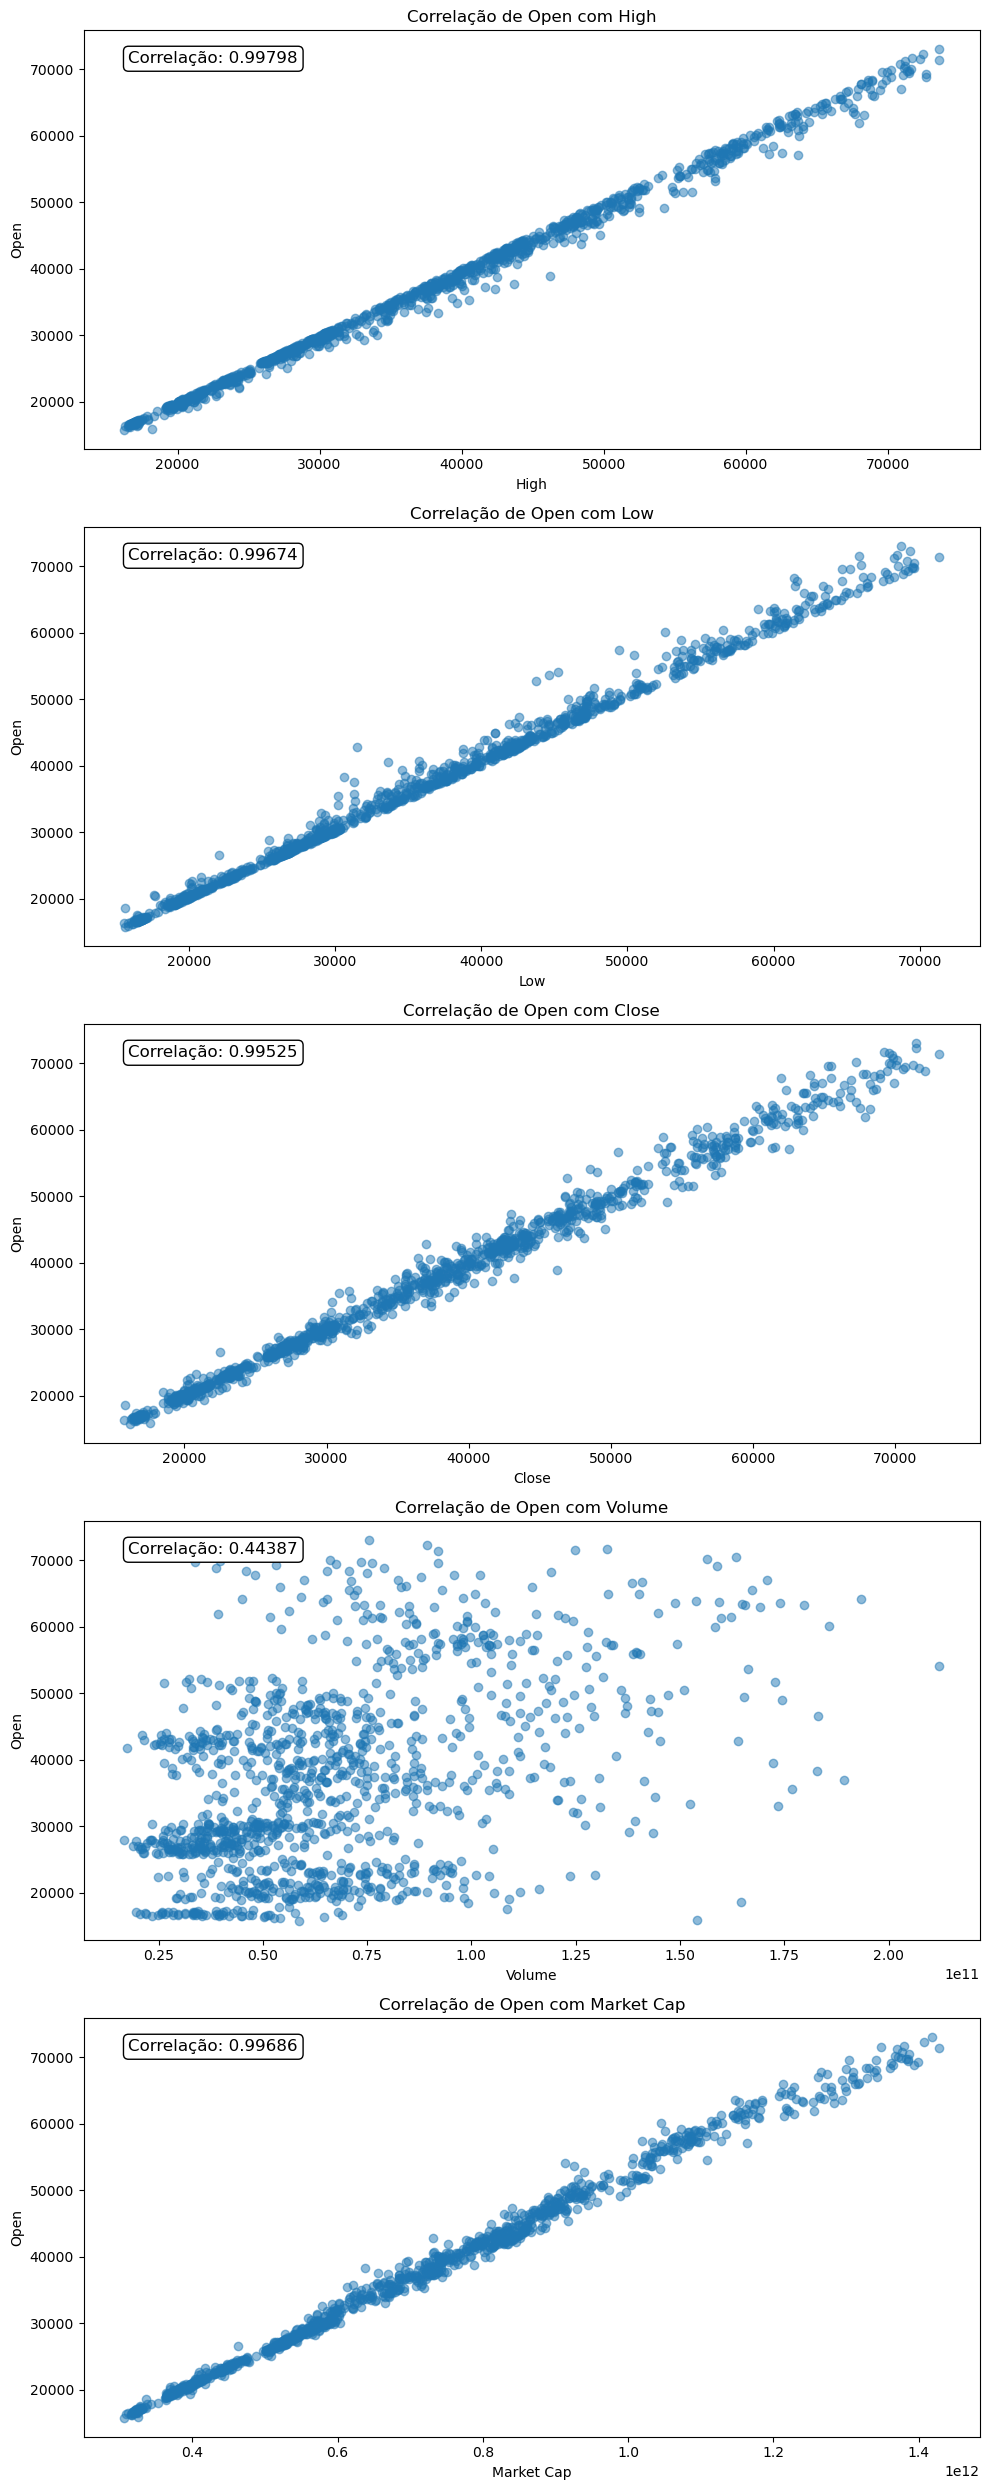

In [19]:
colunas = ['High', 'Low', 'Close', 'Volume', 'Market Cap']

# Crie uma figura e um conjunto de eixos com 6 subtramas
fig, axs = plt.subplots(5, 1, figsize=(10, 25))

# Flatten the axs array to make it easier to iterate over
axs = axs.flatten()

# Iterar sobre cada coluna especificada e criar um histograma para ela
for i, coluna in enumerate(colunas):
    correlation = dados['Open'].corr(dados[coluna])
    axs[i].scatter(dados[coluna], dados['Open'], alpha=0.5)
    axs[i].set_title(f'Correlação de Open com {coluna}')
    axs[i].set_xlabel(f'{coluna}')
    axs[i].set_ylabel('Open')
    axs[i].annotate(f'Correlação: {correlation:.5f}', 
                    xy=(0.05, 0.95), 
                    xycoords='axes fraction', 
                    fontsize=12, 
                    ha='left', 
                    va='top',
                    bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='white'))
    
# Ajustar layout para evitar sobreposição
plt.tight_layout()

# Mostrar os histogramas
plt.show()

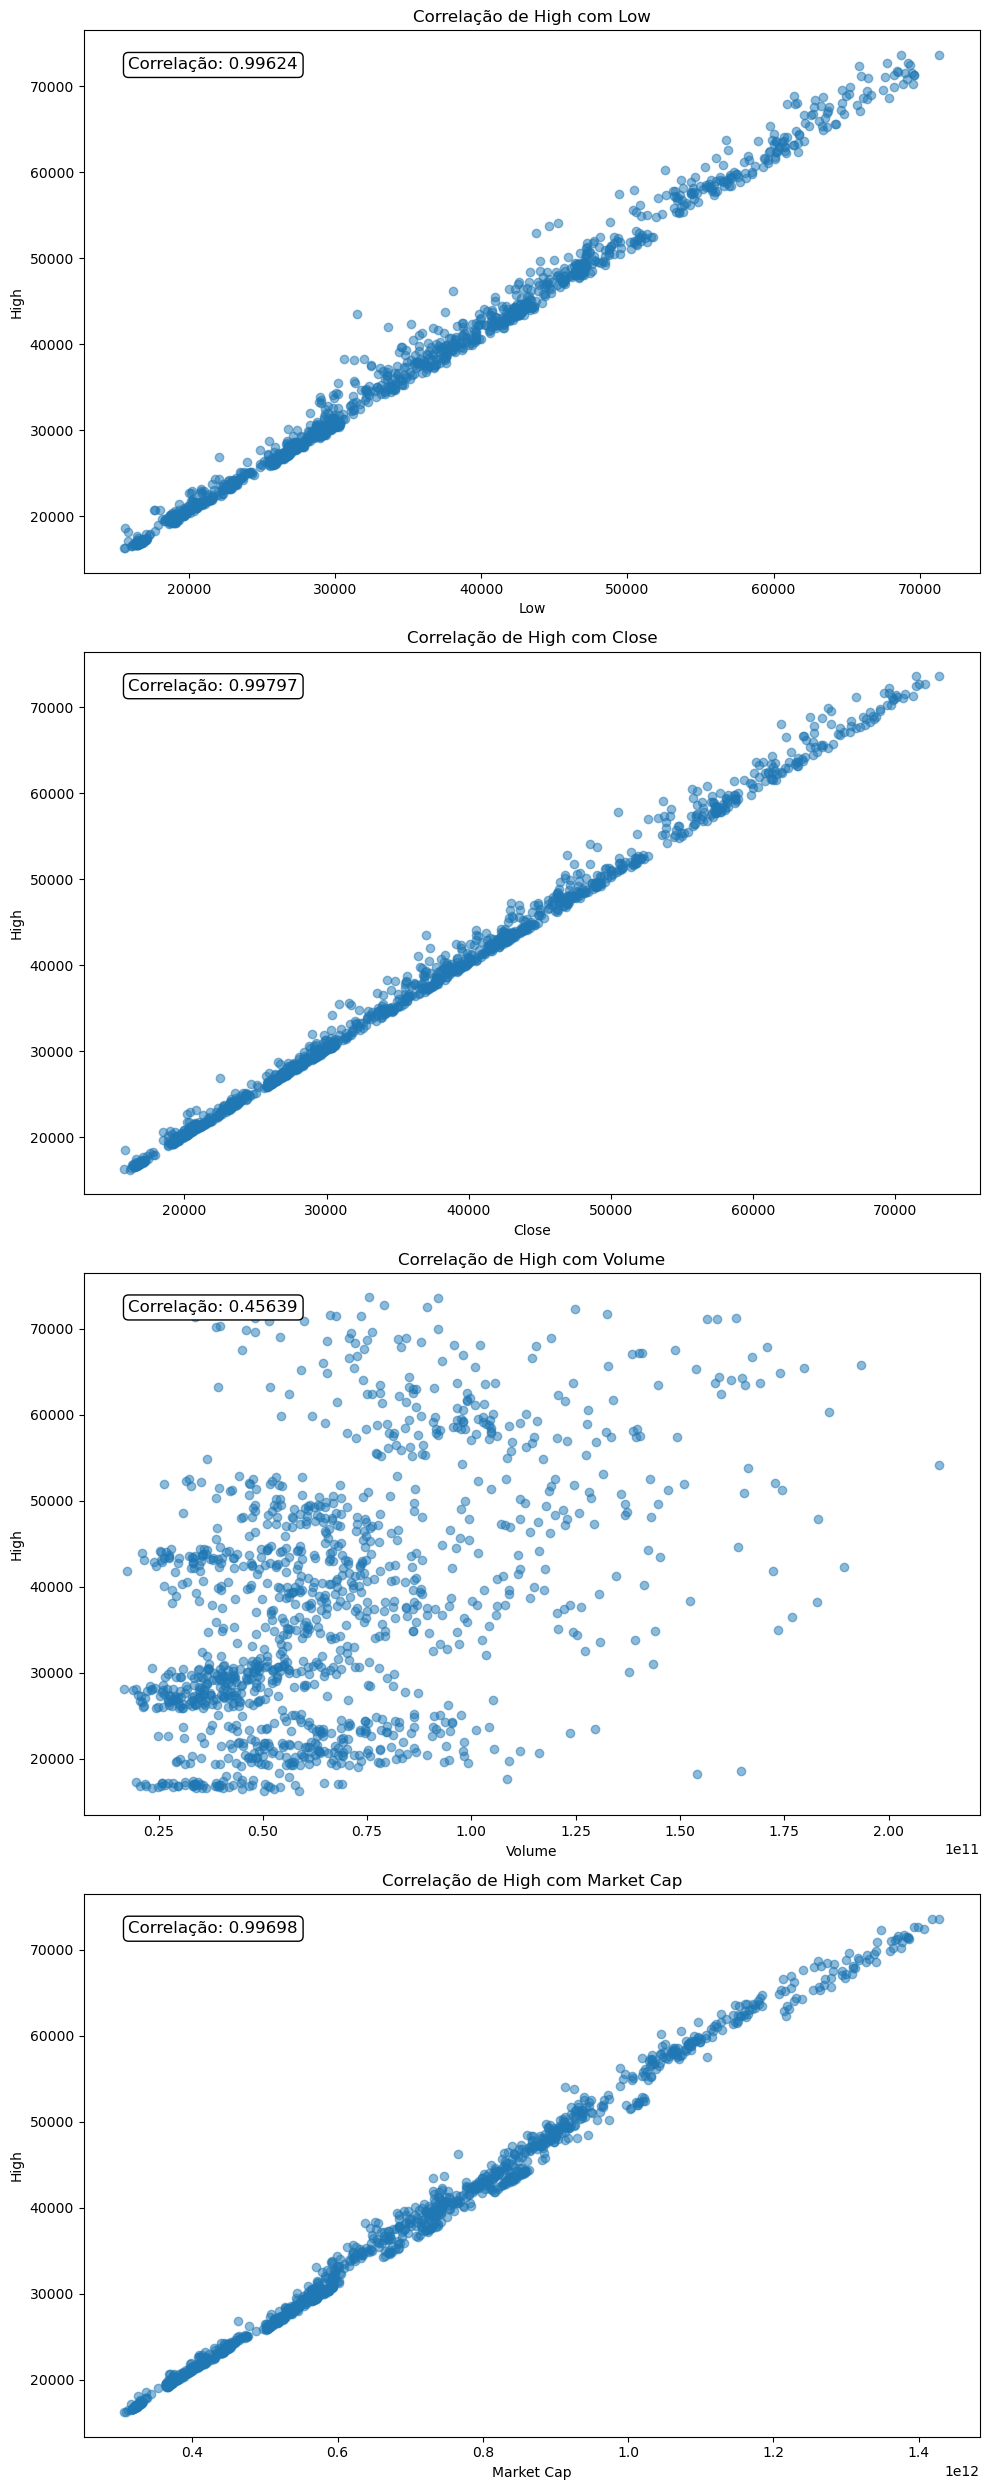

In [20]:
colunas = ['Low', 'Close', 'Volume', 'Market Cap']

# Crie uma figura e um conjunto de eixos com 6 subtramas
fig, axs = plt.subplots(4, 1, figsize=(10, 25))

# Flatten the axs array to make it easier to iterate over
axs = axs.flatten()

# Iterar sobre cada coluna especificada e criar um histograma para ela
for i, coluna in enumerate(colunas):
    correlation = dados['High'].corr(dados[coluna])
    axs[i].scatter(dados[coluna], dados['High'], alpha=0.5)
    axs[i].set_title(f'Correlação de High com {coluna}')
    axs[i].set_xlabel(f'{coluna}')
    axs[i].set_ylabel('High')
    axs[i].annotate(f'Correlação: {correlation:.5f}', 
                    xy=(0.05, 0.95), 
                    xycoords='axes fraction', 
                    fontsize=12, 
                    ha='left', 
                    va='top',
                    bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='white'))

# Ajustar layout para evitar sobreposição
plt.tight_layout()

# Mostrar os histogramas
plt.show()

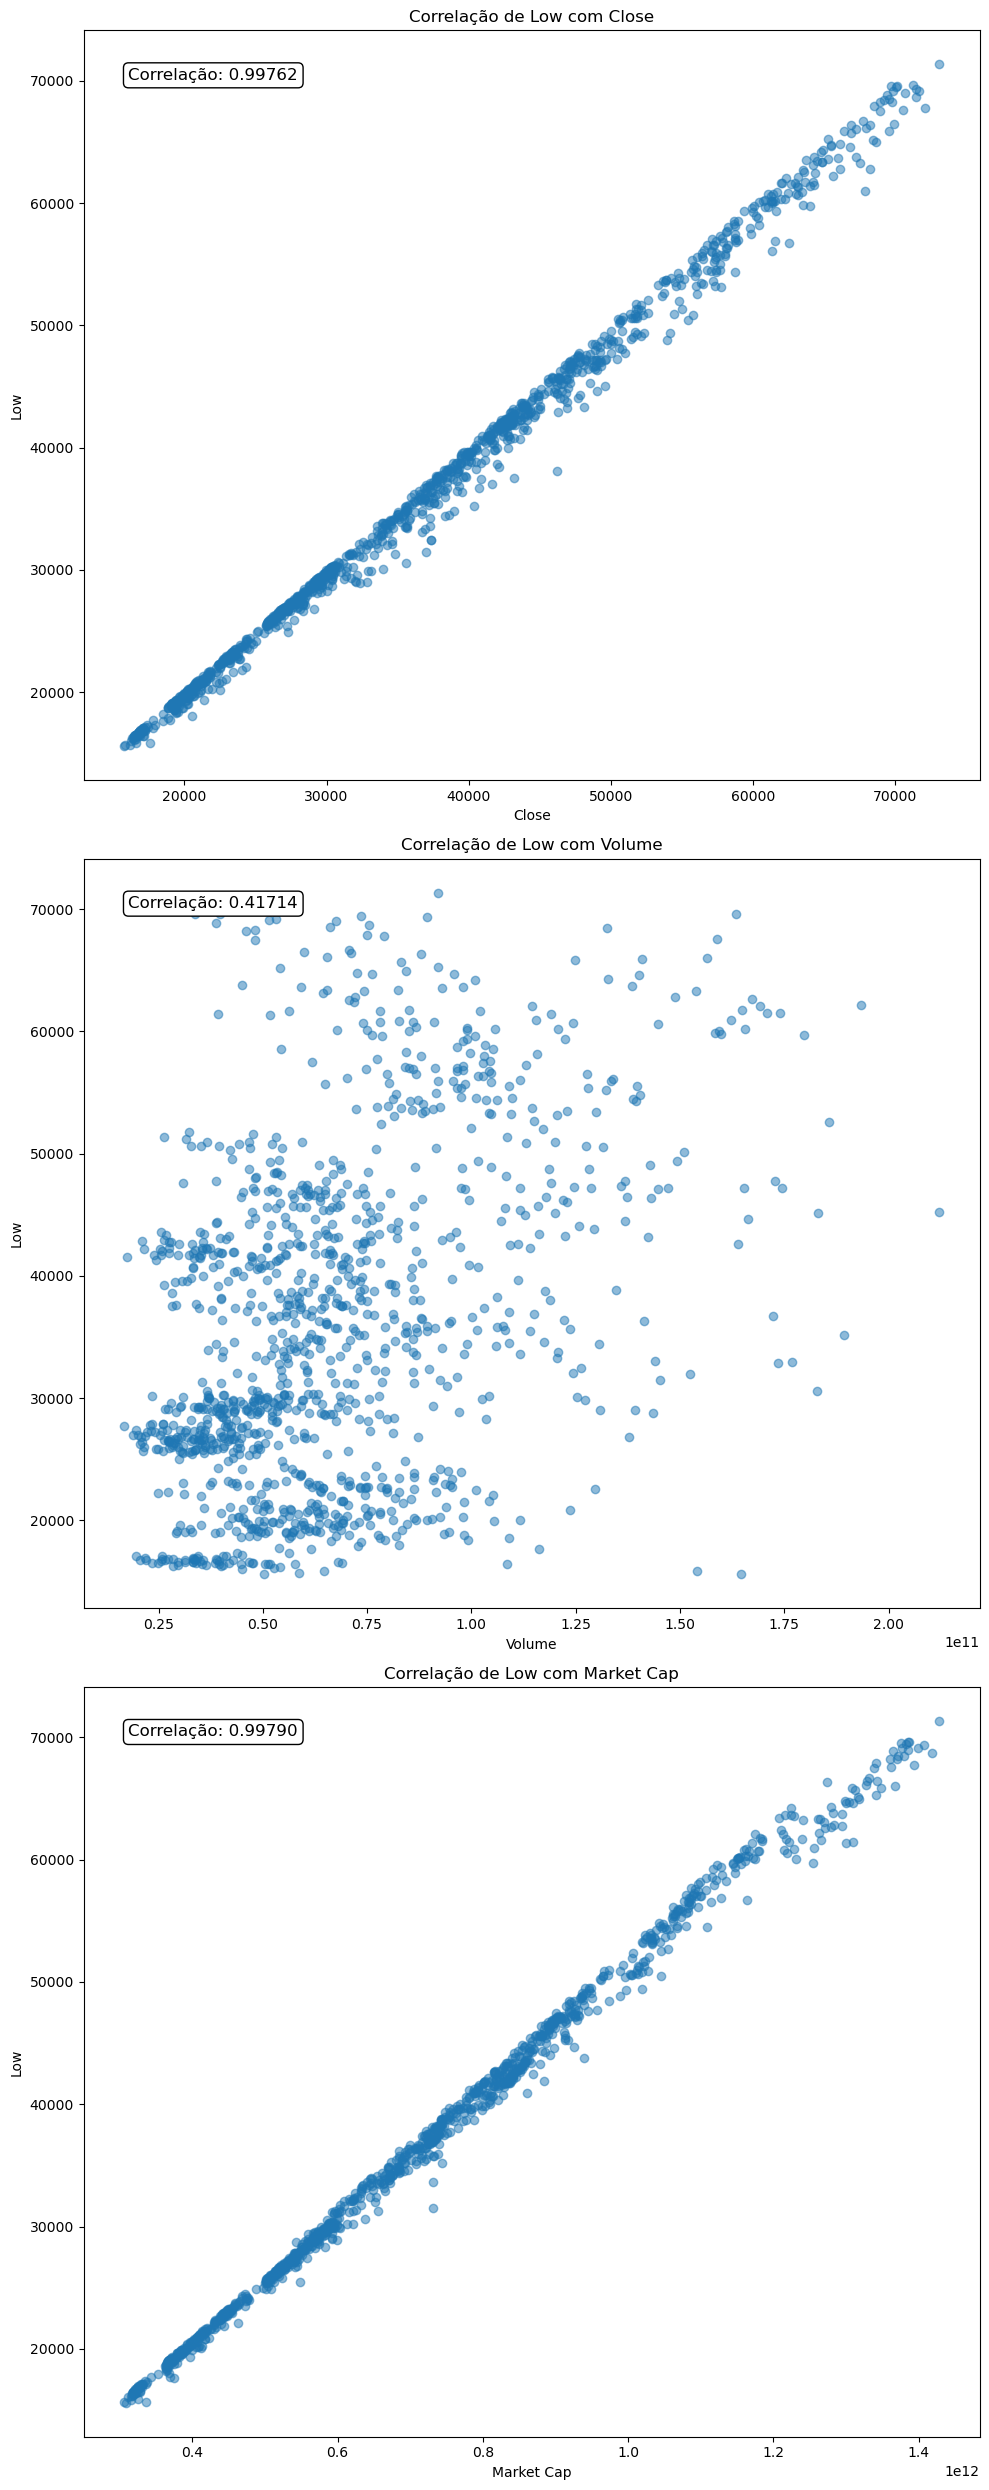

In [21]:
colunas = ['Close', 'Volume', 'Market Cap']

# Crie uma figura e um conjunto de eixos com 6 subtramas
fig, axs = plt.subplots(3, 1, figsize=(10, 25))

# Flatten the axs array to make it easier to iterate over
axs = axs.flatten()

# Iterar sobre cada coluna especificada e criar um histograma para ela
for i, coluna in enumerate(colunas):
    correlation = dados['Low'].corr(dados[coluna])
    axs[i].scatter(dados[coluna], dados['Low'], alpha=0.5)
    axs[i].set_title(f'Correlação de Low com {coluna}')
    axs[i].set_xlabel(f'{coluna}')
    axs[i].set_ylabel('Low')
    axs[i].annotate(f'Correlação: {correlation:.5f}', 
                    xy=(0.05, 0.95), 
                    xycoords='axes fraction', 
                    fontsize=12, 
                    ha='left', 
                    va='top',
                    bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='white'))

# Ajustar layout para evitar sobreposição
plt.tight_layout()

# Mostrar os histogramas
plt.show()

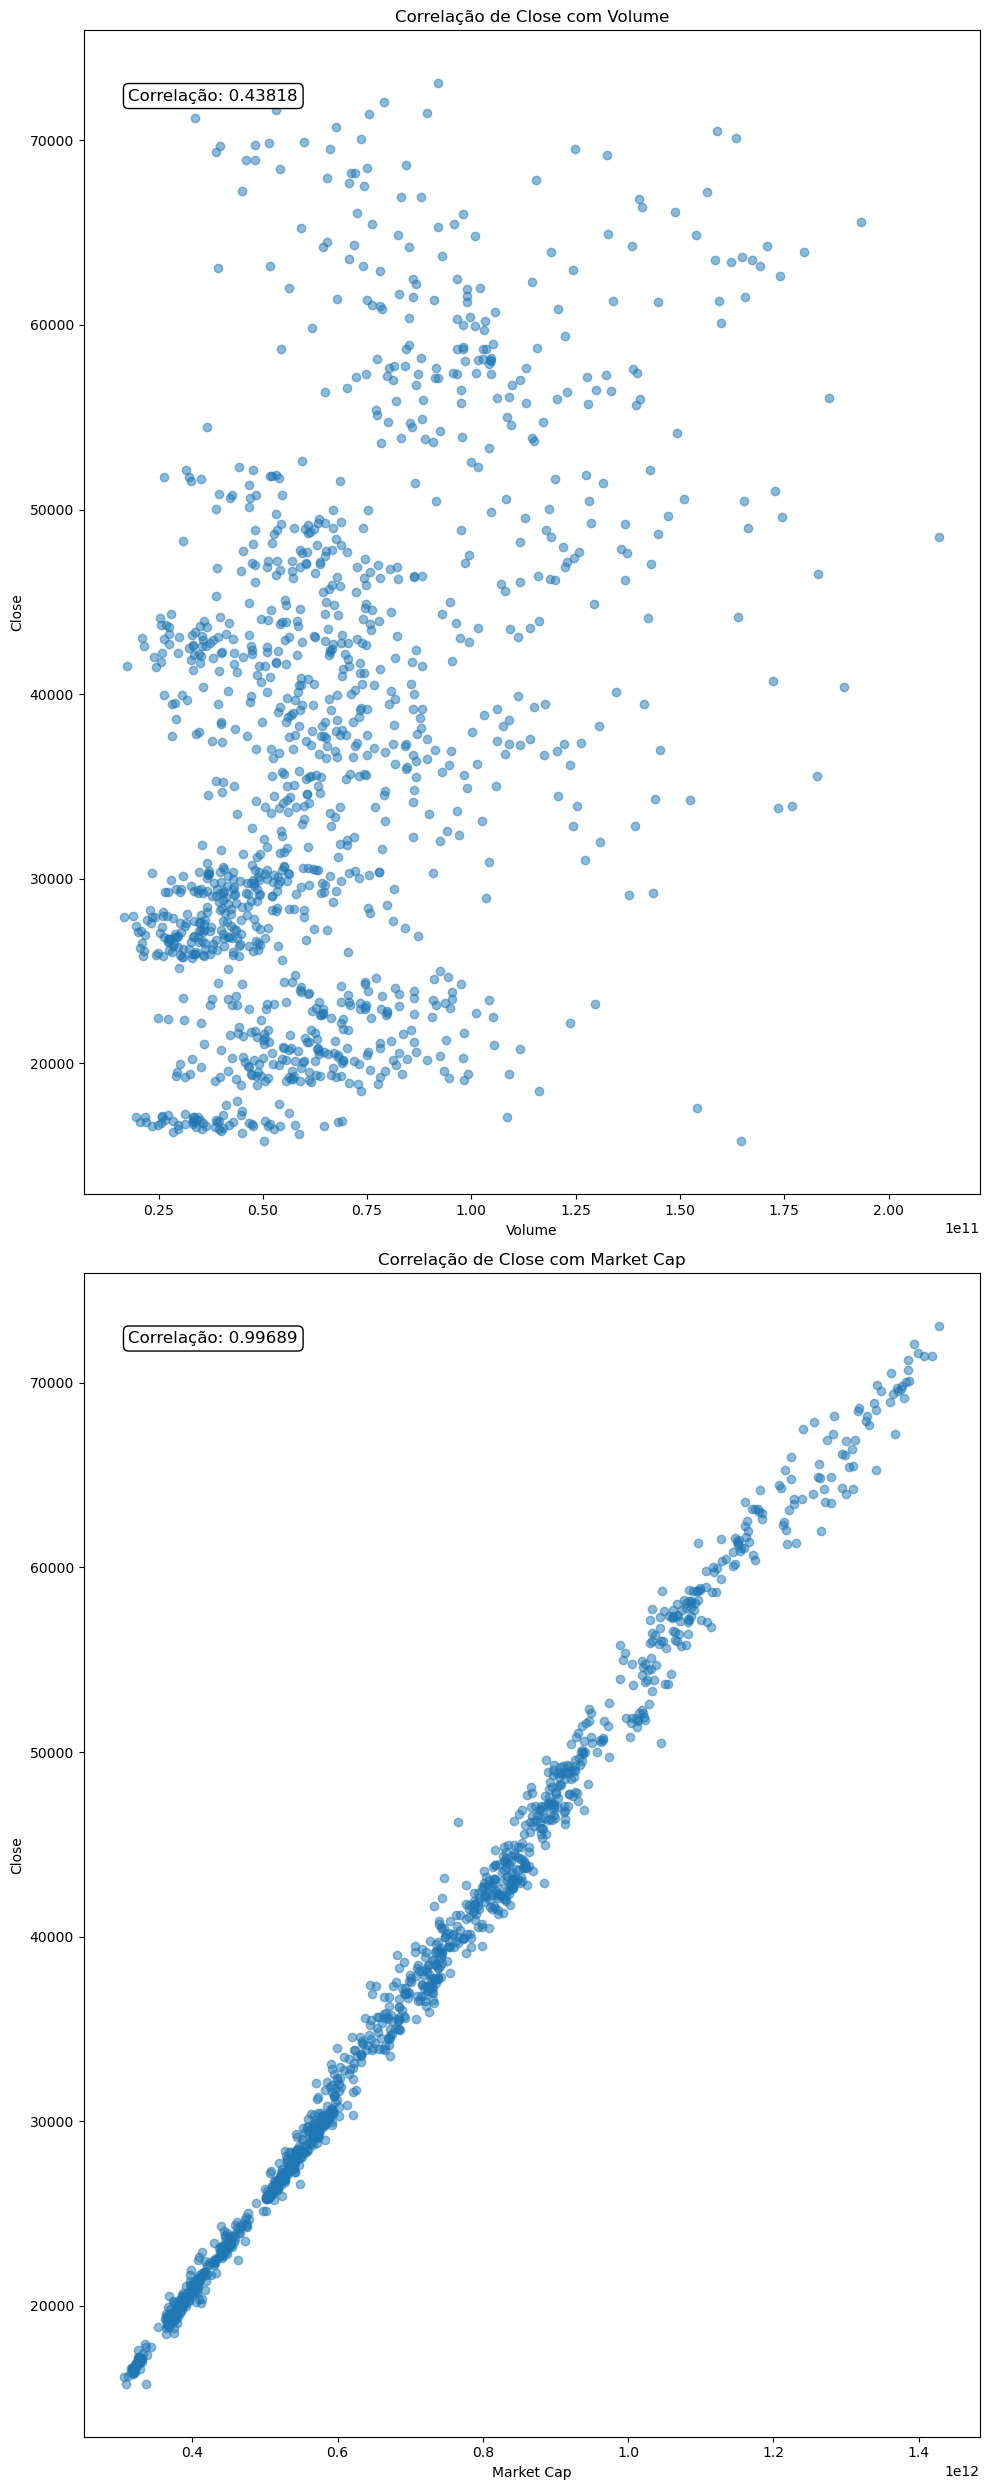

In [22]:
colunas = ['Volume', 'Market Cap']

# Crie uma figura e um conjunto de eixos com 6 subtramas
fig, axs = plt.subplots(2, 1, figsize=(10, 25))

# Flatten the axs array to make it easier to iterate over
axs = axs.flatten()

# Iterar sobre cada coluna especificada e criar um histograma para ela
for i, coluna in enumerate(colunas):
    correlation = dados['Close'].corr(dados[coluna])
    axs[i].scatter(dados[coluna], dados['Close'], alpha=0.5)
    axs[i].set_title(f'Correlação de Close com {coluna}')
    axs[i].set_xlabel(f'{coluna}')
    axs[i].set_ylabel('Close')
    axs[i].annotate(f'Correlação: {correlation:.5f}', 
                    xy=(0.05, 0.95), 
                    xycoords='axes fraction', 
                    fontsize=12, 
                    ha='left', 
                    va='top',
                    bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='white'))

# Ajustar layout para evitar sobreposição
plt.tight_layout()

# Mostrar os histogramas
plt.show()

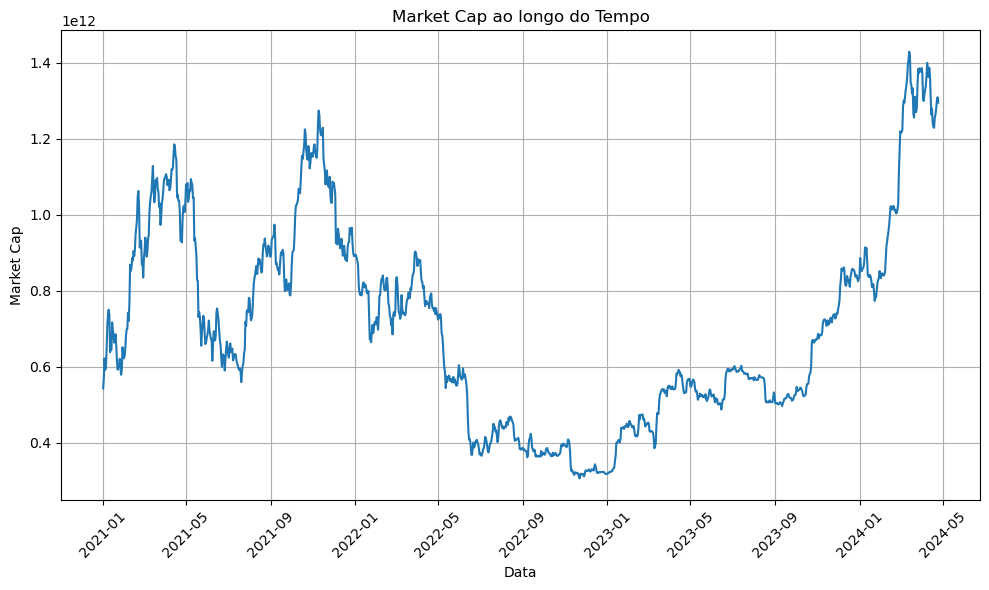

In [23]:
dados = dados.sort_values(by='Start')

plt.figure(figsize=(10, 6))
plt.plot(dados['Start'], dados['Market Cap'], linestyle='-')
plt.title('Market Cap ao longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Market Cap')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

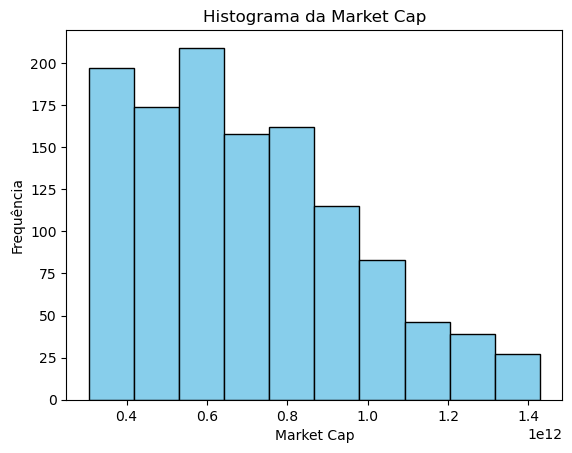

In [24]:
plt.hist(dados['Market Cap'], bins=10, color='skyblue', edgecolor='black')

# Adicionar rótulos e título
plt.xlabel('Market Cap')
plt.ylabel('Frequência')
plt.title('Histograma da Market Cap')

# Mostrar o histograma
plt.show()

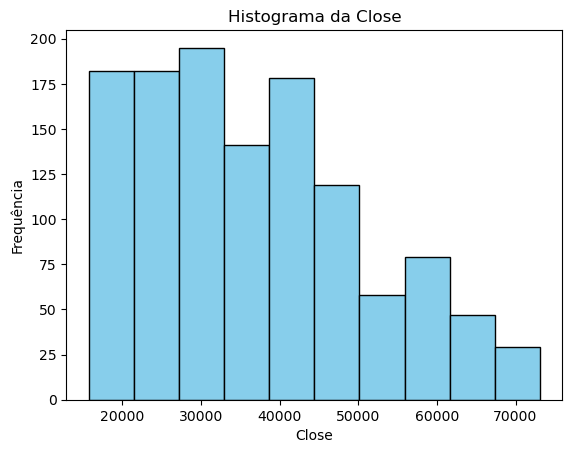

In [25]:
plt.hist(dados['Close'], bins=10, color='skyblue', edgecolor='black')

# Adicionar rótulos e título
plt.xlabel('Close')
plt.ylabel('Frequência')
plt.title('Histograma da Close')

# Mostrar o histograma
plt.show()

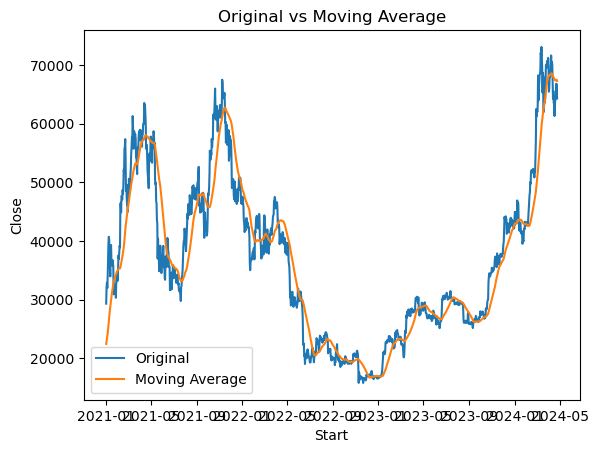

In [26]:
plt.plot(dados['Start'], dados['Close'], label='Original')
plt.plot(dados['Start'], dados['MM_close'], label='Moving Average')
plt.xlabel('Start')
plt.ylabel('Close')
plt.title('Original vs Moving Average')
plt.legend()
plt.show()

In [27]:
dados['Close'].min()

15779.971701749892

In [28]:
menor_valor = dados['Close'].idxmin()

linha = dados.loc[menor_valor]
linha

Start            2022-11-21 00:00:00
End              2022-11-22 00:00:00
Open                      16286.8064
High                      16286.8064
Low                       15598.4951
Close                   15779.971702
Volume            50201276579.555557
Market Cap       308166351834.299133
Year                            2022
Mes                               11
MM_close                18730.553965
MM_volume         74979632345.282852
MM_market_cap    360613710577.939758
pct_change                 -3.139537
Name: 520, dtype: object

In [29]:
filtrado = dados.loc[dados['Start'] >= linha['Start']]

filtrado.head()

,Start,End,Open,High,Low,Close,Volume,Market Cap,Year,Mes,MM_close,MM_volume,MM_market_cap,pct_change
520,2022-11-21,2022-11-22,16286.806400,16286.8064,15598.495100,15779.971702,5.020128e+10,3.081664e+11,2022,11,18730.553965,7.497963e+10,3.606137e+11,-3.139537
519,2022-11-22,2022-11-23,15781.030076,16260.7217,15666.274500,16174.957400,5.861563e+10,3.063924e+11,2022,11,18618.095049,7.595567e+10,3.585207e+11,2.503082
518,2022-11-23,2022-11-24,16221.670000,16652.2104,16167.276600,16615.229200,5.419175e+10,3.164517e+11,2022,11,18527.422899,7.584310e+10,3.567057e+11,2.721935
517,2022-11-24,2022-11-25,16624.779500,16779.3432,16474.392577,16597.731300,5.131614e+10,3.189791e+11,2022,11,18410.318090,7.547287e+10,3.548222e+11,-0.105312
516,2022-11-25,2022-11-26,16609.375900,16609.3759,16371.869099,16511.911278,4.053965e+10,3.168598e+11,2022,11,18268.914334,7.310279e+10,3.522648e+11,-0.517059


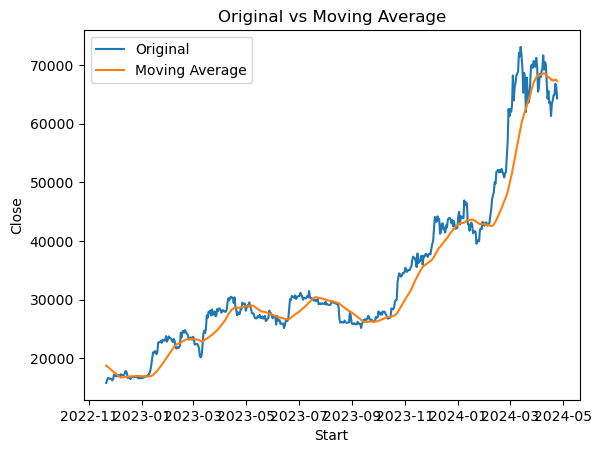

In [30]:
plt.plot(filtrado['Start'], filtrado['Close'], label='Original')
plt.plot(filtrado['Start'], filtrado['MM_close'], label='Moving Average')
plt.xlabel('Start')
plt.ylabel('Close')
plt.title('Original vs Moving Average')
plt.legend()
plt.show()

In [31]:
dados

,Start,End,Open,High,Low,Close,Volume,Market Cap,Year,Mes,MM_close,MM_volume,MM_market_cap,pct_change
1209,2021-01-01,2021-01-02,28938.896888,29560.027546,28718.621788,29300.190936,6.455859e+10,5.429904e+11,2021,1,22437.174318,6.245949e+10,4.130268e+11,NaN
1208,2021-01-02,2021-01-03,29329.695772,33158.612438,29014.295884,32093.264962,7.010424e+10,5.704312e+11,2021,1,22859.351318,6.328095e+10,4.201229e+11,9.532614
1207,2021-01-03,2021-01-04,32148.048500,34717.662742,32057.582963,32877.607283,1.243495e+11,6.217950e+11,2021,1,23330.698472,6.600220e+10,4.290276e+11,2.443947
1206,2021-01-04,2021-01-05,32949.399464,33553.450548,29066.665438,31973.832154,1.309183e+11,5.918035e+11,2021,1,23758.904316,6.891637e+10,4.370079e+11,-2.748908
1205,2021-01-05,2021-01-06,32023.293433,34359.990071,30087.201862,33965.160423,1.254265e+11,5.989281e+11,2021,1,24246.519912,7.205562e+10,4.451288e+11,6.227994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2024-04-20,2024-04-21,63824.060000,65351.330000,63321.190000,64857.990000,1.537410e+11,1.263725e+12,2024,4,67371.934333,9.968056e+10,1.324326e+12,1.394554
3,2024-04-21,2024-04-22,64875.750000,65638.740000,64302.470000,64896.870000,1.326574e+11,1.278730e+12,2024,4,67416.242333,1.017432e+11,1.324587e+12,0.059946
2,2024-04-22,2024-04-23,64952.020000,67180.030000,64598.000000,66818.890000,1.400725e+11,1.299703e+12,2024,4,67502.271000,1.042665e+11,1.325598e+12,2.961653
1,2024-04-23,2024-04-24,66761.020000,67174.020000,65884.150000,66386.610000,1.408621e+11,1.308576e+12,2024,4,67473.597000,1.074611e+11,1.326475e+12,-0.646943


In [32]:
dados.reset_index(inplace=True)
dados

,index,Start,End,Open,High,Low,Close,Volume,Market Cap,Year,Mes,MM_close,MM_volume,MM_market_cap,pct_change
0,1209,2021-01-01,2021-01-02,28938.896888,29560.027546,28718.621788,29300.190936,6.455859e+10,5.429904e+11,2021,1,22437.174318,6.245949e+10,4.130268e+11,NaN
1,1208,2021-01-02,2021-01-03,29329.695772,33158.612438,29014.295884,32093.264962,7.010424e+10,5.704312e+11,2021,1,22859.351318,6.328095e+10,4.201229e+11,9.532614
2,1207,2021-01-03,2021-01-04,32148.048500,34717.662742,32057.582963,32877.607283,1.243495e+11,6.217950e+11,2021,1,23330.698472,6.600220e+10,4.290276e+11,2.443947
3,1206,2021-01-04,2021-01-05,32949.399464,33553.450548,29066.665438,31973.832154,1.309183e+11,5.918035e+11,2021,1,23758.904316,6.891637e+10,4.370079e+11,-2.748908
4,1205,2021-01-05,2021-01-06,32023.293433,34359.990071,30087.201862,33965.160423,1.254265e+11,5.989281e+11,2021,1,24246.519912,7.205562e+10,4.451288e+11,6.227994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1205,4,2024-04-20,2024-04-21,63824.060000,65351.330000,63321.190000,64857.990000,1.537410e+11,1.263725e+12,2024,4,67371.934333,9.968056e+10,1.324326e+12,1.394554
1206,3,2024-04-21,2024-04-22,64875.750000,65638.740000,64302.470000,64896.870000,1.326574e+11,1.278730e+12,2024,4,67416.242333,1.017432e+11,1.324587e+12,0.059946
1207,2,2024-04-22,2024-04-23,64952.020000,67180.030000,64598.000000,66818.890000,1.400725e+11,1.299703e+12,2024,4,67502.271000,1.042665e+11,1.325598e+12,2.961653
1208,1,2024-04-23,2024-04-24,66761.020000,67174.020000,65884.150000,66386.610000,1.408621e+11,1.308576e+12,2024,4,67473.597000,1.074611e+11,1.326475e+12,-0.646943
